In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import statsmodels.formula.api as sm


In [2]:
df = pd.read_csv("data_encodée.csv")

C:\Users\antoi\OneDrive\Documents\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (52,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df['Price_length'] = df['Price'] / df['Length']
df['Price_length'] = pd.to_numeric(df['Price_length'])

In [4]:
df['logprice'] = np.log(df['Price'])

In [5]:
oui = [2, 1]

conditions = [
    (df['Transsexual'] == 2),
    (df['Transsexual'] == 1),
    (df['Transsexual'] == 0),
]

values = [1, 1, 0]

df['Transgender'] = np.select(conditions, values)

In [6]:
df['Transgender'].value_counts()

0    18745
1     4346
Name: Transgender, dtype: int64

In [7]:
pd.options.display.max_columns = None
display(df)

,Unnamed: 0,Service_x,Length,Price,Agency,City,Incall,On_Time,Porn_Star,Languages,Service_y,Other_City_Serviced,Phone_Type,Smokes,Availability,Services_Delivered_As_Promised,Build,Ethnicity,Age,Eye_Color,Hair_Color,Hair_Type,Hair_Length,Piercings,Pussy,Photo_Accurate,Height,Transsexual,Breast_Size,Breast_Cup,Breast_Implants,Breast_Appearance,Tattoos,Massage,Sex,Blow_Job,Cum_In_Mouth,Touch_Pussy,Kiss,Two_Girl_Action,More_Than_One_Guy_At_A_Time,Multiple_Pops_Allowed,Squirt,Female_Condom,Massage_Quality,S_M,Lick_Pussy,Anal,Will_Bring_Second_Provider,Full_No_Rush_Session,Rimming,Allow_Film_Or_Picture,service_a,Transsexual_Functionality,Transsexual_Versatility,Transsexual_Cock_Size,Transsexual_Circumcised,Transsexual_Ejaculates,Phone 2,Agency_Name,service_b,service_c,Service_z,service_d,States,pays,Price_length,logprice,Transgender
0,0,3,30,200,NaN,53,NaN,NaN,NaN,30,None,247,4,0,2,1,2,61,1,2,0,4,4,3,3,3,3,1,2,2,2,5,1,0,2,3,0,0,2,0,0,0,0,0,4,0,0,3,0,0,9,0,NaN,4,9,6,3,3,NaN,74,NaN,NaN,NaN,NaN,56,65,6.666667,5.298317,1
1,1,4,60,150,NaN,992,NaN,NaN,NaN,56,None,247,2,0,1,1,1,108,2,0,0,4,4,3,0,3,0,1,2,3,2,5,1,1,2,3,0,0,2,0,0,0,0,0,4,0,0,3,0,0,0,0,NaN,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,66,39,2.500000,5.010635,1
2,2,3,60,300,NaN,101,NaN,NaN,NaN,3,Escort/Massage,247,3,0,2,1,2,18,2,2,3,4,6,5,2,3,3,1,2,2,2,6,0,7,2,3,0,3,1,0,0,0,0,0,1,0,2,3,0,3,0,0,Massage and Blow Job,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,55,65,5.000000,5.703782,1
3,3,3,30,300,NaN,533,NaN,NaN,NaN,3,Escort/Massage,247,4,0,0,1,6,18,1,2,0,4,4,3,3,3,3,1,2,2,2,6,1,7,2,0,0,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,Massage Hand Job,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,12,65,10.000000,5.703782,1
4,4,9,45,300,NaN,1024,NaN,NaN,NaN,3,Escort/Massage,247,4,1,1,0,7,110,5,3,4,1,4,0,0,2,2,1,9,6,1,2,2,7,0,1,0,1,1,0,0,0,0,0,3,3,1,0,0,1,0,0,NaN,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,12,65,6.666667,5.703782,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23086,3592,3,30,100,NaN,178,NaN,NaN,NaN,60,Escort/Massage/S&M,247,5,1,1,1,0,110,1,6,2,4,6,0,3,3,2,0,2,2,1,3,0,0,2,2,1,2,3,0,0,0,0,0,4,0,0,0,0,3,0,0,Escort Incall,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,93,65,3.333333,4.605170,0
23087,3594,0,45,125,NaN,938,NaN,NaN,NaN,60,Escort,247,3,1,1,1,1,110,3,6,3,4,6,0,3,3,2,0,2,1,1,6,1,0,2,3,0,2,2,0,0,3,0,0,4,0,2,0,0,3,0,0,NaN,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,55,65,2.777778,4.828314,0
23088,3595,5,60,200,NaN,203,NaN,NaN,NaN,60,Escort/Massage/S&M,247,3,0,1,1,0,110,1,6,4,4,6,5,2,3,2,0,2,1,1,9,0,1,2,2,1,1,1,0,0,2,0,0,4,3,1,1,0,2,0,0,NaN,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,79,65,3.333333,5.298317,0
23089,3596,3,60,200,NaN,434,NaN,NaN,NaN,60,Escort/Massage,247,3,1,1,1,6,110,2,6,0,3,6,3,3,3,3,0,1,2,1,9,0,4,2,3,3,3,2,0,0,3,0,0,1,0,0,0,0,3,0,0,NaN,4,0,6,3,3,NaN,74,NaN,NaN,NaN,NaN,40,65,3.333333,5.298317,0


Transformation de la variable age, et ajout de age carré

In [8]:
pd.to_numeric(df['Age'])

0        1
1        2
2        2
3        1
4        5
        ..
23086    1
23087    3
23088    1
23089    2
23090    4
Name: Age, Length: 23091, dtype: int64

In [9]:
df['Age2']=df['Age']*df['Age']

In [10]:
result_1 = sm.ols(formula= " logprice ~ Age ", data=df).fit()

L'âge au carré n'apporte pas grand chose, en effet, comme la variable âge correspond à des intervalles, il n'y a pas de raison de la mettre au carré, on remarque juste que l'âge au carré est davantage significatif, signifiant simplement que une variable plus précise aurait sans doute eu un pouvoir prédictif meilleur. Finalement la variable âge dans une régression simple est négativement corrélée avec la logprice

On va remplacer les don't know par des nan pour les variables non traitées ensuite, mais aussi pour d'autres variables

In [11]:

conditions = [
    (df['Agency'] == 0),
    (df['Agency'] == 1),
    (df['Agency'] == 2),
    (df['Agency'] == 3),
]

values = [0, 'NaN', 1, 2]

df['Agency'] = np.select(conditions, values)

In [12]:

conditions = [
    (df['Smokes'] == 0),
    (df['Smokes'] == 1),
    (df['Smokes'] == 2),
    (df['Smokes'] == 3),
]

values = [0, 1, 1, 1]

df['Smokes'] = np.select(conditions, values)

In [13]:

conditions = [
    (df['Availability'] == 0),
    (df['Availability'] == 1),
    (df['Availability'] == 2),
    (df['Availability'] == 3),
]

values = [0, 'NaN', 1, 1]

df['Availability'] = np.select(conditions, values)

In [14]:

conditions = [
    (df['Ethnicity'] == 0),
    (df['Ethnicity'] == 1),
    (df['Ethnicity'] == 2),
    (df['Ethnicity'] == 3),
    (df['Ethnicity'] == 4),
    (df['Ethnicity'] == 5),
    (df['Ethnicity'] == 6),
    (df['Ethnicity'] == 7),
    (df['Ethnicity'] == 8),
    (df['Ethnicity'] == 9),
    (df['Ethnicity'] == 10),
    (df['Ethnicity'] == 11),
    (df['Ethnicity'] == 12),
    (df['Ethnicity'] == 13),
    (df['Ethnicity'] == 14),
    (df['Ethnicity'] == 15),
    (df['Ethnicity'] == 16),
    (df['Ethnicity'] == 17),
    (df['Ethnicity'] == 18),
    (df['Ethnicity'] == 19),
    (df['Ethnicity'] == 20),
    (df['Ethnicity'] == 21),
    (df['Ethnicity'] == 22),
    (df['Ethnicity'] == 23),
    (df['Ethnicity'] == 24),
    (df['Ethnicity'] == 25),
    (df['Ethnicity'] == 26),
    (df['Ethnicity'] == 27),
    (df['Ethnicity'] == 28),
    (df['Ethnicity'] == 29),
    (df['Ethnicity'] == 30),
    (df['Ethnicity'] == 31),
    (df['Ethnicity'] == 32),
    (df['Ethnicity'] == 33),
    (df['Ethnicity'] == 34),
    (df['Ethnicity'] == 35),
    (df['Ethnicity'] == 36),
    (df['Ethnicity'] == 37),
    (df['Ethnicity'] == 38),
    (df['Ethnicity'] == 39),
    (df['Ethnicity'] == 40),
    (df['Ethnicity'] == 41),
    (df['Ethnicity'] == 42),
    (df['Ethnicity'] == 43),
    (df['Ethnicity'] == 44),
    (df['Ethnicity'] == 45),
    (df['Ethnicity'] == 46),
    (df['Ethnicity'] == 47),
    (df['Ethnicity'] == 48),
    (df['Ethnicity'] == 49),
    (df['Ethnicity'] == 50),
    (df['Ethnicity'] == 51),
    (df['Ethnicity'] == 52),
    (df['Ethnicity'] == 53),
    (df['Ethnicity'] == 54),
    (df['Ethnicity'] == 55),
 

]

values = [0, 0, 0, 0,5,0,5,5,5,2,2,2,2,2,2,2,3,3,3,2,3,0,3,3,3,3,3,3,3,3,4,3,3,3,1,1,4,2,2,2,2,0,5,5,2,2,2,2,2,3,3,3,2,2,2,2]

df['Ethnicity'] = np.select(conditions, values)

In [15]:

conditions = [
    (df['Build'] == 0),
    (df['Build'] == 1),
    (df['Build'] == 2),
    (df['Build'] == 3),
    (df['Build'] == 4),
    (df['Build'] == 5),
    (df['Build'] == 6),
    (df['Build'] == 7),

]

values = [0, 1, 2, 3,3,3,4,5]

df['Build'] = np.select(conditions, values)

In [16]:

conditions = [
    (df['Piercings'] == 0),
    (df['Piercings'] == 1),
    (df['Piercings'] == 2),
    (df['Piercings'] == 3),
    (df['Piercings'] == 4),
    (df['Piercings'] == 5),
    (df['Piercings'] == 6),
    (df['Piercings'] == 7),
    (df['Piercings'] == 8),
     (df['Piercings'] == 9),
     (df['Piercings'] == 10),

]

values = [0, 0, 0, 'NaN',0,1,0,0,0,0,0]

df['Piercings'] = np.select(conditions, values)

In [17]:
conditions = [
    (df['Pussy'] == 0),
    (df['Pussy'] == 1),
    (df['Pussy'] == 2),
    (df['Pussy'] == 3),
]

values = ['Nan', 0, 1, 1]

df['Pussy'] = np.select(conditions, values)

In [18]:
conditions = [
    (df['Photo_Accurate'] == 0),
    (df['Photo_Accurate'] == 1),
    (df['Photo_Accurate'] == 2),
    (df['Photo_Accurate'] == 3),
    (df['Photo_Accurate'] == 4),
]

values = [0, 0, 0, 1,0]

df['Photo_Accurate'] = np.select(conditions, values)

In [19]:
df['Height2']=df['Height']*df['Height']

### Régressions

1. Régression avec que le temps et dummy transgenre

In [20]:

result_2 = sm.ols(formula= " logprice ~ C(Transgender) + C(Smokes)+ Height+ Height2", data=df).fit()

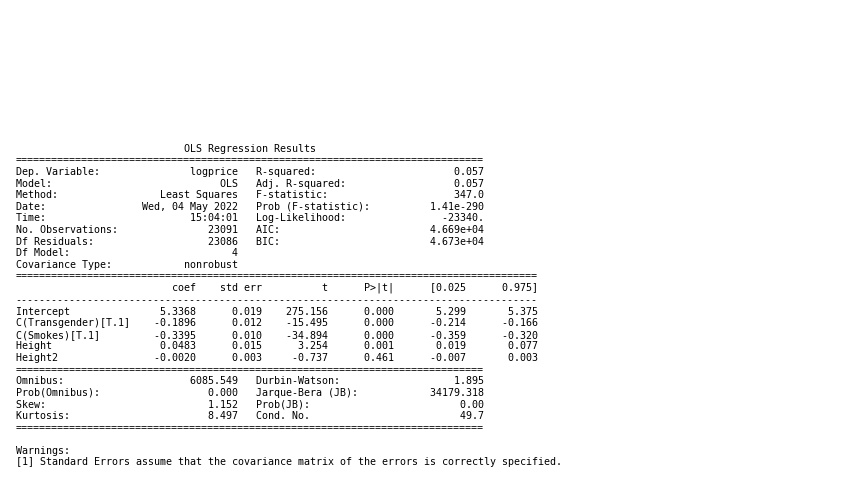

In [21]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_2.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_1.png')

2. Régression sur les services

In [22]:
result_1 = sm.ols(formula= " logprice ~ C(Service_x) + Length", data=df).fit()

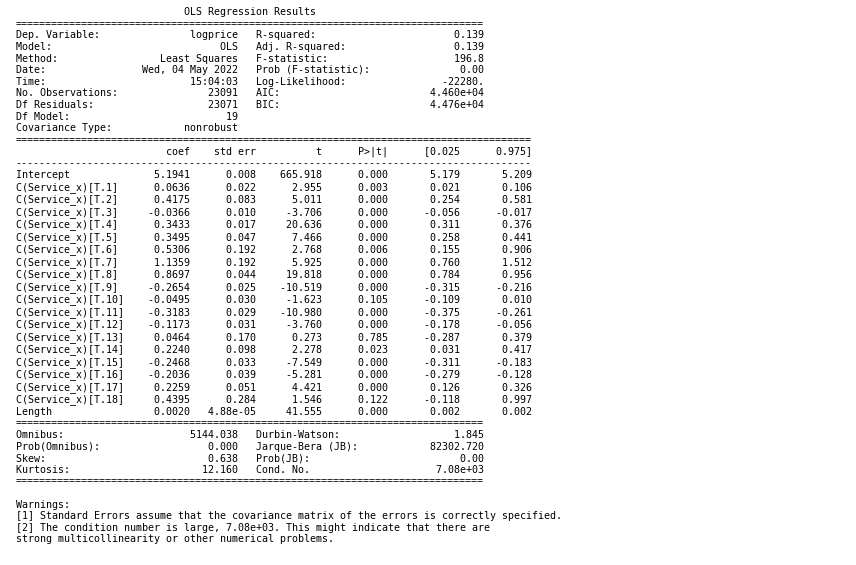

In [23]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_1.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_1.png')

In [24]:
err_series = result_1.params - result_1.conf_int()[0]


In [25]:
coef_df = pd.DataFrame({'coef': result_1.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

Voici l'ordre des labels

array(['Escort ', 'Escort And Anal', 'Escort And Dinner Date',
       'Escort Incall', 'Escort Outcall', 'Escort Second Pop',
       'Escort With Another Guy', 'Escort With Couple',
       'Escort With another Girl', 'Massage ', 'Massage Body to Body',
       'Massage Hand Job', 'Massage Nude', 'Massage Sensual Domination',
       'Massage Tantra', 'Massage Topless', 'Massage and Blow Job',
       'S&M ', 'S&M With Another Girl'], dtype=object)


<ipython-input-26-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


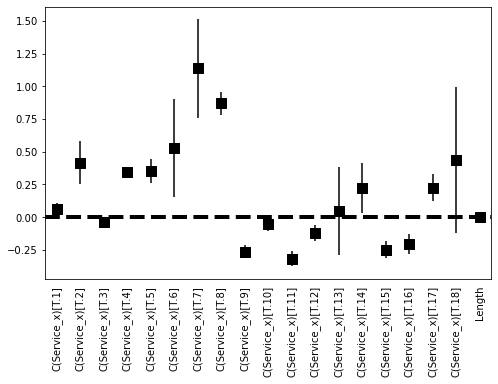

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

Au vu des résultats on regroupe les labels en 3 catégories: Massage, S et M et escort.

In [27]:

conditions = [
    (df['Service_x'] == 0),
    (df['Service_x'] == 1),
    (df['Service_x'] == 2),
    (df['Service_x'] == 3),
    (df['Service_x'] == 4),
    (df['Service_x'] == 5),
    (df['Service_x'] == 6),
    (df['Service_x'] == 7),
    (df['Service_x'] == 8),
     (df['Service_x'] == 9),
    (df['Service_x'] == 10),
    (df['Service_x'] == 11),
    (df['Service_x'] == 12),
    (df['Service_x'] == 13),
    (df['Service_x'] == 14),
    (df['Service_x'] == 15),
    (df['Service_x'] == 16),
    (df['Service_x'] == 17),
    (df['Service_x'] == 18),
]

values = [0, 0, 0, 0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2]

df['Service_x'] = np.select(conditions, values)

In [75]:
result_2 = sm.ols(formula= " logprice ~ C(Service_x) + Length+C(Transgender)", data=df).fit()

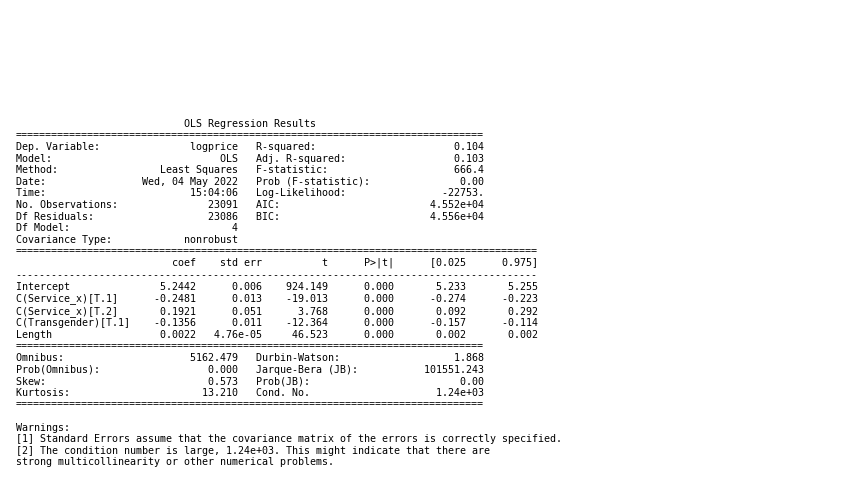

In [29]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_2.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_2.png')

In [30]:
err_series = result_2.params - result_2.conf_int()[0]
err_series
coef_df = pd.DataFrame({'coef': result_2.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })


<ipython-input-31-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


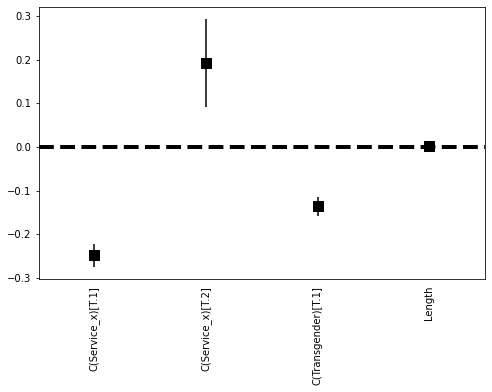

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

In [32]:
result_3 = sm.ols(formula= " logprice ~ C(Service_x) + Length+C(Transgender)", data=df).fit()

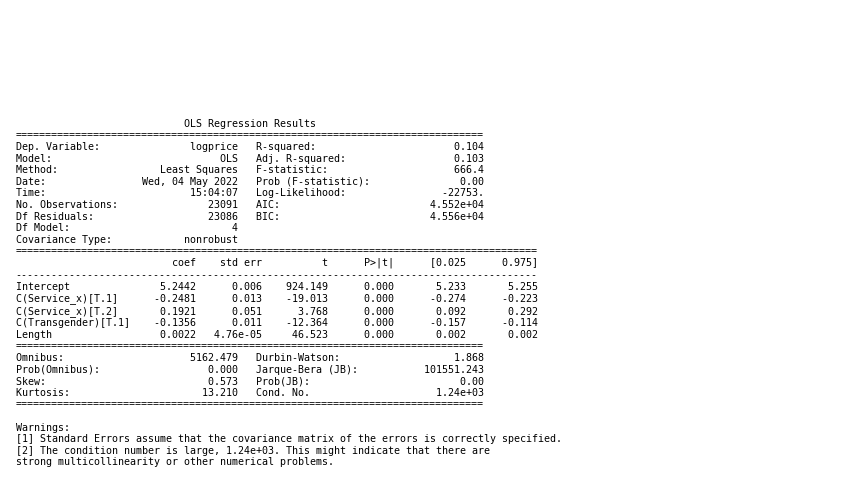

In [33]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_3.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result3.png')

3. Sur les caractéristiques physiques

Maintenant, on va faire une régression qui se focalise sur les caractéristiques physiques de la prostituée

In [34]:
result_4 = sm.ols(formula= " logprice ~ Length+C(Transgender)+ C(Breast_Size)+ C(Breast_Cup)+C(Breast_Implants)+C(Breast_Appearance)+C(Tattoos)", data=df).fit()

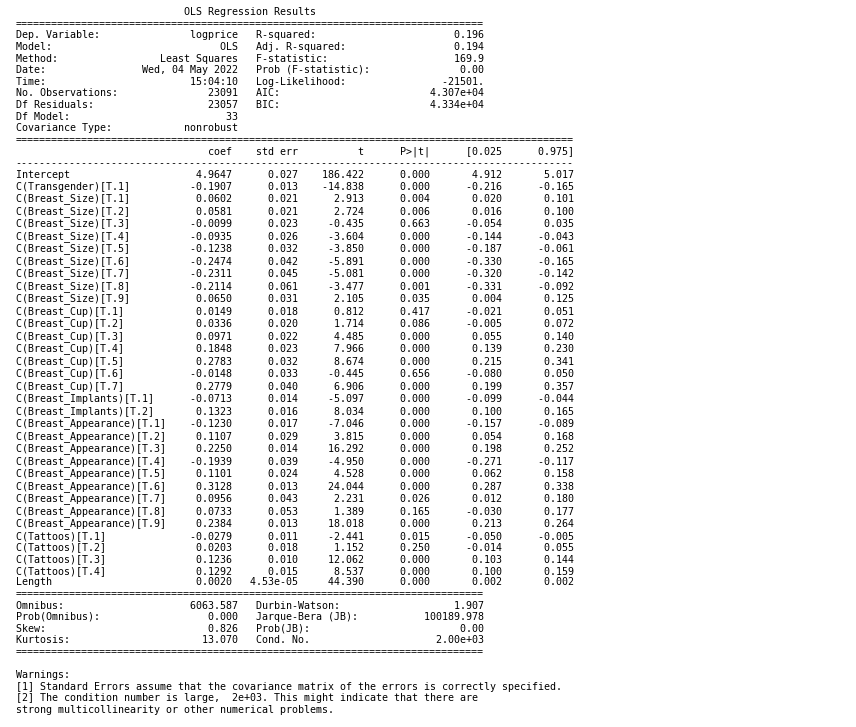

In [35]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_4.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result4.png')

In [36]:
err_series = result_4.params - result_4.conf_int()[0]
err_series
coef_df = pd.DataFrame({'coef': result_4.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })


<ipython-input-37-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


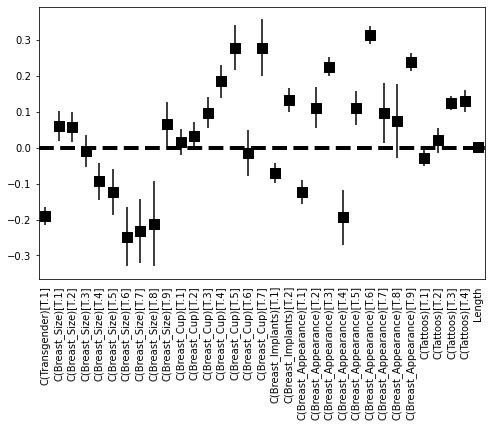

In [37]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

Plus on est fine+grosse poitrine, plus le pouvoir de négociayion est élevé

In [38]:

conditions = [
    (df['Breast_Appearance'] == 0),
    (df['Breast_Appearance'] == 1),
    (df['Breast_Appearance'] == 2),
    (df['Breast_Appearance'] == 3),
    (df['Breast_Appearance'] == 4),
    (df['Breast_Appearance'] == 5),
    (df['Breast_Appearance']== 6),
    (df['Breast_Appearance'] == 7),
    (df['Breast_Appearance'] == 8),
     (df['Breast_Appearance'] == 9),
]

values = [0, 0, 0, 1,0,0,1,0,0,1]

df['Breast_Appearance'] = np.select(conditions, values)

In [39]:

conditions = [
    (df['Breast_Cup'] == 0),
    (df['Breast_Cup'] == 1),
    (df['Breast_Cup'] == 2),
    (df['Breast_Cup'] == 3),
    (df['Breast_Cup'] == 4),
    (df['Breast_Cup'] == 5),
    (df['Breast_Cup'] == 6),
    (df['Breast_Cup'] == 7),

]

values = [1, 2, 3, 4,5,6,0,7]

df['Breast_Cup'] = np.select(conditions, values)
pd.to_numeric(df['Breast_Cup'])
     

0        3
1        4
2        3
3        3
4        0
        ..
23086    3
23087    2
23088    2
23089    3
23090    2
Name: Breast_Cup, Length: 23091, dtype: int32

In [40]:

conditions = [
    (df['Tattoos'] == 0),
    (df['Tattoos'] == 1),
    (df['Tattoos'] == 2),
    (df['Tattoos'] == 3),
    (df['Tattoos'] == 4),
]

values = [1, 1, 1, 0,1]

df['Tattoos'] = np.select(conditions, values)

In [41]:
pd.to_numeric(df['Breast_Size'])

0        2
1        2
2        2
3        2
4        9
        ..
23086    2
23087    2
23088    2
23089    1
23090    3
Name: Breast_Size, Length: 23091, dtype: int64

In [87]:

conditions = [
    (df['Breast_Implants'] == 0),
    (df['Breast_Implants'] == 1),
    (df['Breast_Implants'] == 2),

]

values = ['Nan', 0, 1]

df['Breast_Implants'] = np.select(conditions, values)

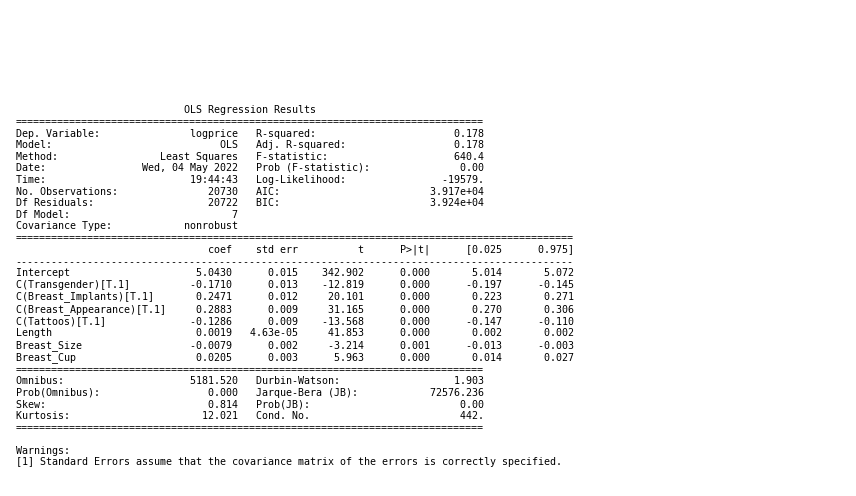

In [88]:
result_4 = sm.ols(formula= " logprice ~ Length+C(Transgender)+ Breast_Size+ Breast_Cup+C(Breast_Implants)+C(Breast_Appearance)+C(Tattoos)", data=df).fit()
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_4.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result4.png')

Ne pas avoir de tatouages a un effet positif sur le prix

4. Une régression sur les variables de services

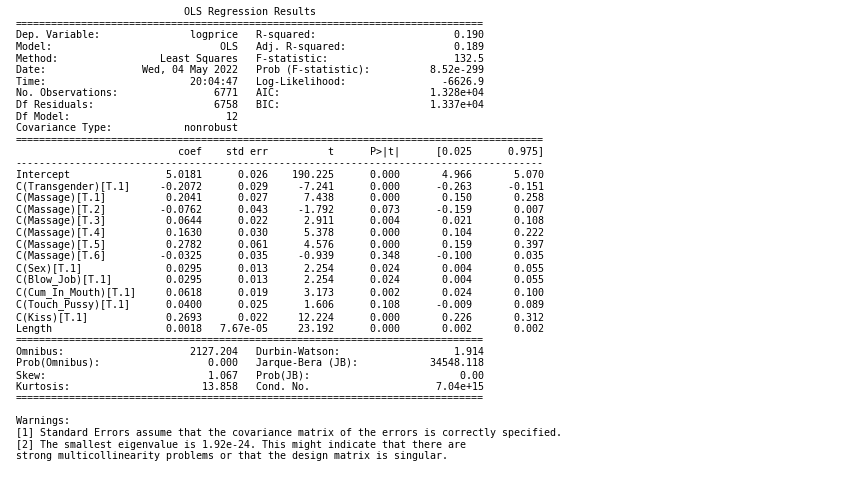

In [103]:
result_5 = sm.ols(formula= " logprice ~ Length+ C(Transgender)+ C(Massage)+ C(Sex)+ C(Blow_Job)+C(Cum_In_Mouth)+ C(Touch_Pussy)+C(Kiss)", data=df).fit()
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_5.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result5.png')

In [44]:
err_series = result_5.params - result_5.conf_int()[0]
err_series
coef_df = pd.DataFrame({'coef': result_5.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })


<ipython-input-45-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


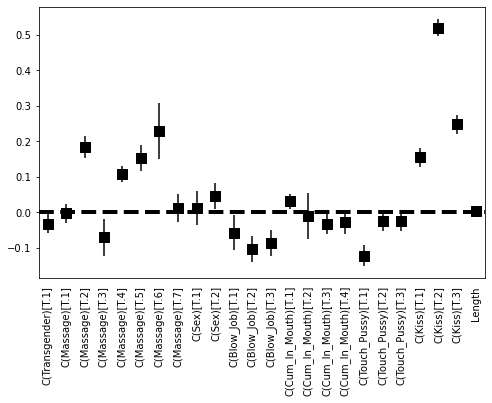

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

In [90]:

conditions = [
    (df['Massage'] == 0),
    (df['Massage'] == 1),
    (df['Massage'] == 2),
    (df['Massage'] == 3),
    (df['Massage'] == 4),
    (df['Massage'] == 5),
    (df['Massage']== 6),
    (df['Massage'] == 7),

]

values = ['Nan', 0, 1, 2,3,4,5,6]

df['Massage'] = np.select(conditions, values)

In [93]:

conditions = [
    (df['Sex'] == 0),
    (df['Sex'] == 1),
    (df['Sex'] == 2),]


values = ['Nan', 0, 1]

df['Sex'] = np.select(conditions, values)

In [96]:

conditions = [
    (df['Blow_Job'] == 0),
    (df['Blow_Job'] == 1),
    (df['Blow_Job'] == 2),
(df['Blow_Job'] == 3),]


values = ['Nan', 0, 1,2]

df['Blow_Job'] = np.select(conditions, values)

In [98]:

conditions = [
    (df['Cum_In_Mouth'] == 0),
    (df['Cum_In_Mouth'] == 1),
    (df['Cum_In_Mouth'] == 2),
(df['Cum_In_Mouth'] == 3),
(df['Cum_In_Mouth'] == 4),]


values = ['Nan', 0, 1,2, 3]

df['Cum_In_Mouth'] = np.select(conditions, values)

In [100]:

conditions = [
    (df['Touch_Pussy'] == 0),
    (df['Touch_Pussy'] == 1),
    (df['Touch_Pussy'] == 2),
(df['Touch_Pussy'] == 3),]

values = ['Nan', 0, 1,1]

df['Touch_Pussy'] = np.select(conditions, values)

In [102]:

conditions = [
    (df['Kiss'] == 0),
    (df['Kiss'] == 1),
    (df['Kiss'] == 2),
(df['Kiss'] == 3),]

values = ['Nan', 0, 1,1]

df['Kiss'] = np.select(conditions, values)

<ipython-input-46-21e1fe74d7a5>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


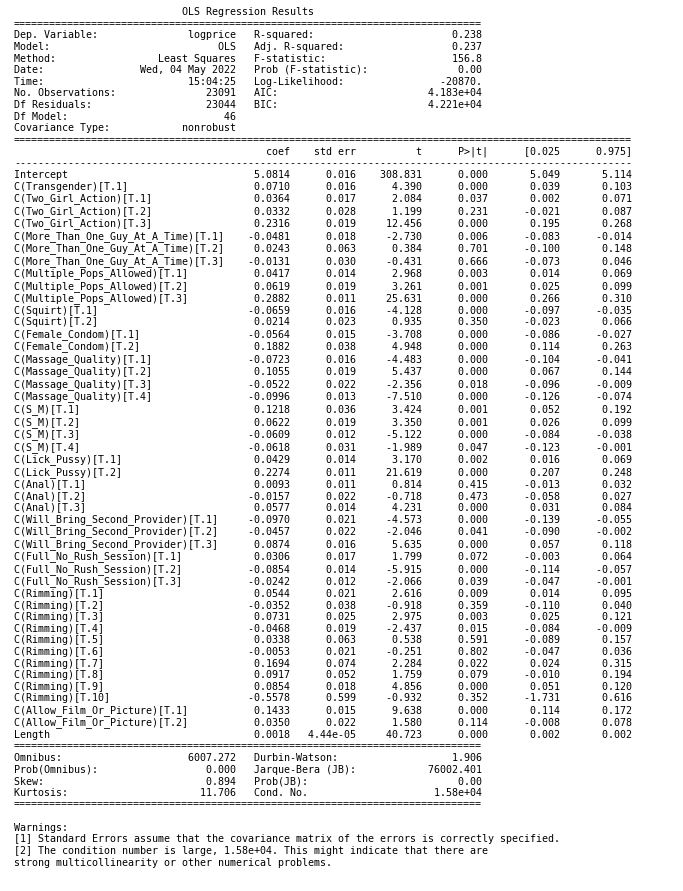

In [46]:
result_6 = sm.ols(formula= " logprice ~ Length+ C(Transgender)+C(Two_Girl_Action)+C(More_Than_One_Guy_At_A_Time)+C(Multiple_Pops_Allowed)+ C(Squirt)+C(Female_Condom)+C(Massage_Quality)+C(S_M)+C(Lick_Pussy)+ C(Anal)+C(Will_Bring_Second_Provider)+C(Full_No_Rush_Session)+C(Rimming)+C(Allow_Film_Or_Picture)", data=df).fit()
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_6.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result5.png')

In [47]:
err_series = result_6.params - result_6.conf_int()[0]
err_series
coef_df = pd.DataFrame({'coef': result_6.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

<ipython-input-48-4616d6f1b1a0>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


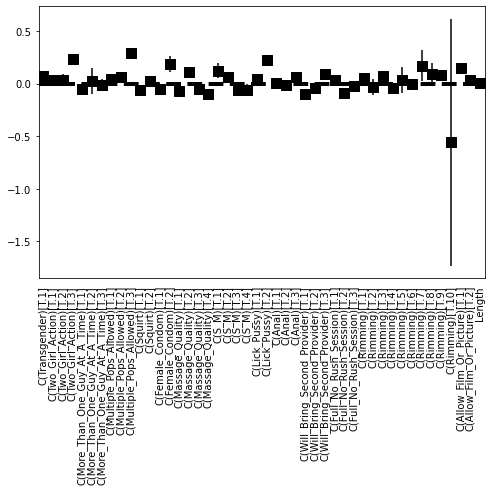

In [48]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

In [57]:
conditions = [
    (df['More_Than_One_Guy_At_A_Time'] == 0),
    (df['More_Than_One_Guy_At_A_Time']==1),
    (df['More_Than_One_Guy_At_A_Time'] == 2),
    (df['More_Than_One_Guy_At_A_Time'] == 3),

    


]

values = ['Nan', 0, 1,1]

df['More_Than_One_Guy_At_A_Time'] = np.select(conditions, values)

In [ ]:
conditions = [
    (df['Two_Girl_Action'] == 0),
    (df['Two_Girl_Action']==1),
    (df['Two_Girl_Action'] == 2),
    (df['Two_Girl_Action'] == 3),

    


]

values = ['Nan', 0, 1,1]

df['Two_Girl_Action'] = np.select(conditions, values)

In [60]:
conditions = [
    (df['Multiple_Pops_Allowed'] == 0),
    (df['Multiple_Pops_Allowed']==1),
    (df['Multiple_Pops_Allowed'] == 2),
    (df['Multiple_Pops_Allowed'] == 3),

    


]

values = ['Nan', 0, 1,1]

df['Multiple_Pops_Allowed'] = np.select(conditions, values)


In [62]:

conditions = [
    (df['Squirt'] == 0),
    (df['Squirt']==1),
    (df['Squirt'] == 2),
    

    


]

values = ['Nan', 0, 1]

df['Squirt'] = np.select(conditions, values)

In [64]:

conditions = [
    (df['Female_Condom'] == 0),
    (df['Female_Condom']==1),
    (df['Female_Condom'] == 2),
    

    


]

values = ['Nan', 0, 1]

df['Female_Condom'] = np.select(conditions, values)

In [67]:
df['Female_Condom'].value_counts()
#peu de personnes avec un préservatifs féminins, et on enlève bcp de gens avec ceux où on ne sait pas

Nan    17129
0       5683
1        279
Name: Female_Condom, dtype: int64

In [68]:

conditions = [
    (df['Massage_Quality'] == 0),
    (df['Massage_Quality']==1),
    (df['Massage_Quality'] == 2),
      (df['Massage_Quality']==3),
    (df['Massage_Quality'] == 4),
    

    


]

values = [0, 1, 0,1, 'Nan']

df['Massage_Quality'] = np.select(conditions, values)

In [73]:

conditions = [
    (df['S_M'] == 0),
    (df['S_M']==1),
    (df['S_M'] == 2),
      (df['S_M']==3),
    (df['S_M'] == 4),
]

values = ['Nan', 1, 1,0, 1]

df['S_M'] = np.select(conditions, values)

In [85]:

conditions = [
    (df['Lick_Pussy'] == 0),
    (df['Lick_Pussy']==1),
    (df['Lick_Pussy'] == 2),
   
    
]

values = ['Nan', 0, 1]

df['Lick_Pussy'] = np.select(conditions, values)

In [104]:

conditions = [
    (df['Anal'] == 0),
    (df['Anal']==1),
    (df['Anal'] == 2),(df['Anal'] == 3),
   
    
]

values = ['Nan', 0, 'Nan', 1]

df['Anal'] = np.select(conditions, values)

In [113]:

conditions = [
    (df['Will_Bring_Second_Provider'] == 0),
    (df['Will_Bring_Second_Provider']==1),
    (df['Will_Bring_Second_Provider'] == 2),(df['Will_Bring_Second_Provider'] == 3),
   
    
]

values = ['Nan', 0, 1, 2]

df['Will_Bring_Second_Provider'] = np.select(conditions, values)

In [115]:

conditions = [
    (df['Full_No_Rush_Session'] == 0),
    (df['Full_No_Rush_Session']==1),
    (df['Full_No_Rush_Session'] == 2),(df['Full_No_Rush_Session'] == 3),
   
    
]

values = ['Nan', 0, 1, 2]

df['Full_No_Rush_Session'] = np.select(conditions, values)


In [118]:

conditions = [
    (df['Rimming'] == 0),
    (df['Rimming']==1),
    (df['Rimming'] == 2),
    (df['Rimming'] == 3),
      (df['Rimming'] == 4),
    (df['Rimming']==5),
    (df['Rimming'] == 6),
    (df['Rimming'] == 7),
    (df['Rimming'] == 8),
    (df['Rimming'] == 9),
    
]

values = ['Nan', 0, 'Nan', 1, 0, 'Nan', 1,0,'Nan', 1]

df['Rimming'] = np.select(conditions, values)


In [120]:


conditions = [
    (df['Allow_Film_Or_Picture'] == 0),
    (df['Allow_Film_Or_Picture']==1),
    (df['Allow_Film_Or_Picture'] == 2),
   
    
]

values = ['Nan', 0, 1]

df['Allow_Film_Or_Picture'] = np.select(conditions, values)



In [126]:
conditions = [
    (df['Transsexual_Functionality'] == 0),
    (df['Transsexual_Functionality']==1),
    (df['Transsexual_Functionality'] == 2),
     (df['Transsexual_Functionality']==3),
    (df['Transsexual_Functionality'] == 4),
   
    
]

values = ['Nan', 0, 2, 1, 'nan' ]

df['Transsexual_Functionality'] = np.select(conditions, values)


In [129]:
conditions = [
    (df['Transsexual_Cock_Size'] == 0),
    (df['Transsexual_Cock_Size']==1),
    (df['Transsexual_Cock_Size'] == 2),
     (df['Transsexual_Cock_Size']==3),
    (df['Transsexual_Cock_Size'] == 4),
     (df['Transsexual_Cock_Size']==5),
    (df['Transsexual_Cock_Size'] == 6),
   
    
]

values = [4, 0, 1, 2, 3, 'nan','nan' ]

df['Transsexual_Cock_Size'] = np.select(conditions, values)


In [131]:
conditions = [
    (df['Transsexual_Versatility'] == 0),
    (df['Transsexual_Versatility']==1),
    (df['Transsexual_Versatility'] == 2),
     (df['Transsexual_Versatility']==3),
    (df['Transsexual_Versatility'] == 4),

   
    
]

values = [0, 'nan', 1, 2, 'nan' ]

df['Transsexual_Versatility'] = np.select(conditions, values)

In [135]:
conditions = [
    (df['Transsexual_Circumcised'] == 0),
    (df['Transsexual_Circumcised']==1),
    (df['Transsexual_Circumcised'] == 2),
     (df['Transsexual_Circumcised']==3),
   

   
    
]

values = ['nan', 0, 1,'nan' ]

df['Transsexual_Circumcised'] = np.select(conditions, values)


In [137]:
conditions = [
    (df['Transsexual_Ejaculates'] == 0),
    (df['Transsexual_Ejaculates']==1),
    (df['Transsexual_Ejaculates'] == 2),
     (df['Transsexual_Ejaculates']==3),
   

   
    
]

values = ['nan', 0, 1,'nan' ]

df['Transsexual_Ejaculates'] = np.select(conditions, values)


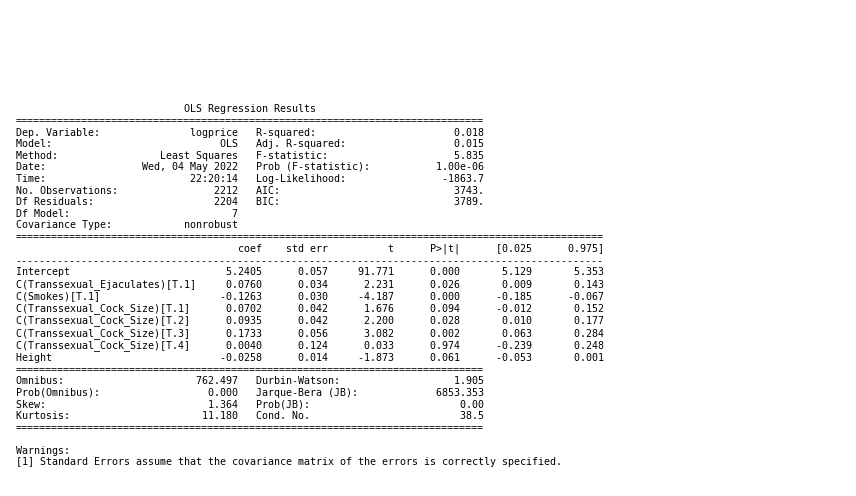

In [138]:

result_2 = sm.ols(formula= " logprice ~ C(Transsexual_Ejaculates) + C(Smokes)+ Height+  C(Transsexual_Cock_Size)", data=df).fit()
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_2.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_1.png')

In [109]:
df.drop(columns=["Incall", "service_b","service_c","Service_z","service_d", "Other_City_Serviced"],inplace=True)

In [122]:
df.drop(columns=[ "service_a"],inplace=True)

In [123]:
df

,Unnamed: 0,Service_x,Length,Price,Agency,City,On_Time,Porn_Star,Languages,Service_y,Phone_Type,Smokes,Availability,Services_Delivered_As_Promised,Build,Ethnicity,Age,Eye_Color,Hair_Color,Hair_Type,Hair_Length,Piercings,Pussy,Photo_Accurate,Height,Transsexual,Breast_Size,Breast_Cup,Breast_Implants,Breast_Appearance,Tattoos,Massage,Sex,Blow_Job,Cum_In_Mouth,Touch_Pussy,Kiss,Two_Girl_Action,More_Than_One_Guy_At_A_Time,Multiple_Pops_Allowed,Squirt,Female_Condom,Massage_Quality,S_M,Lick_Pussy,Anal,Will_Bring_Second_Provider,Full_No_Rush_Session,Rimming,Allow_Film_Or_Picture,Transsexual_Functionality,Transsexual_Versatility,Transsexual_Cock_Size,Transsexual_Circumcised,Transsexual_Ejaculates,Phone 2,Agency_Name,States,pays,Price_length,logprice,Transgender,Age2,Height2
0,0,0,30,200,0,53,NaN,NaN,30,None,4,0,1,1,2,0,1,2,0,4,4,NaN,Nan,1,3,1,2,3,1,0,1,Nan,1,1,Nan,Nan,1,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,0,1,Nan,4,9,6,3,3,NaN,74,56,65,6.666667,5.298317,1,1,9
1,1,0,60,150,0,992,NaN,NaN,56,None,2,0,NaN,1,1,0,2,0,0,4,4,NaN,Nan,1,0,1,2,4,1,0,1,0,1,1,Nan,Nan,1,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,4,0,6,3,3,NaN,74,66,39,2.500000,5.010635,1,4,0
2,2,0,60,300,0,101,NaN,NaN,3,Escort/Massage,3,0,1,1,2,3,2,2,3,4,6,1,1,1,3,1,2,3,1,1,1,6,1,1,Nan,1,0,Nan,Nan,Nan,Nan,Nan,Nan,Nan,1,Nan,Nan,Nan,Nan,Nan,4,0,6,3,3,NaN,74,55,65,5.000000,5.703782,1,4,9
3,3,0,30,300,0,533,NaN,NaN,3,Escort/Massage,4,0,0,1,4,3,1,2,0,4,4,NaN,Nan,1,3,1,2,3,1,1,1,6,Nan,Nan,Nan,1,0,Nan,Nan,0,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,4,0,6,3,3,NaN,74,12,65,10.000000,5.703782,1,1,9
4,4,1,45,300,0,1024,NaN,NaN,3,Escort/Massage,4,1,NaN,0,5,0,5,3,4,1,4,0,0,0,2,1,9,0,0,0,1,6,0,0,Nan,0,0,Nan,Nan,Nan,Nan,Nan,0,0,0,Nan,Nan,Nan,Nan,Nan,4,0,6,3,3,NaN,74,12,65,6.666667,5.703782,1,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23086,3592,0,30,100,0,178,NaN,NaN,60,Escort/Massage/S&M,5,1,NaN,1,0,0,1,6,2,4,6,0,Nan,1,2,0,2,3,0,1,1,Nan,1,1,0,1,1,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,4,0,6,3,3,NaN,74,93,65,3.333333,4.605170,0,1,4
23087,3594,0,45,125,0,938,NaN,NaN,60,Escort,3,1,NaN,1,1,0,3,6,3,4,6,0,1,1,2,0,2,2,0,1,1,Nan,1,1,Nan,1,1,Nan,Nan,1,Nan,Nan,Nan,Nan,1,Nan,Nan,Nan,Nan,Nan,4,0,6,3,3,NaN,74,55,65,2.777778,4.828314,0,9,4
23088,3595,0,60,200,0,203,NaN,NaN,60,Escort/Massage/S&M,3,0,NaN,1,0,0,1,6,4,4,6,1,0,1,2,0,2,2,0,1,1,0,1,1,0,0,0,Nan,Nan,1,Nan,Nan,0,0,0,Nan,Nan,Nan,Nan,Nan,4,0,6,3,3,NaN,74,79,65,3.333333,5.298317,0,1,4
23089,3596,0,60,200,0,434,NaN,NaN,60,Escort/Massage,3,1,NaN,1,4,0,2,6,0,3,6,NaN,Nan,1,3,0,1,3,0,1,1,3,1,1,1,1,1,Nan,Nan,1,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,4,0,6,3,3,NaN,74,40,65,3.333333,5.298317,0,4,9


### Statistiques descriptives

In [51]:
df_1=df[['logprice', 'Length', 'Service_x', 'Age', 'Transgender', 'Pussy', 'Breast_Size']]

corr = df_1.corr(method='spearman')

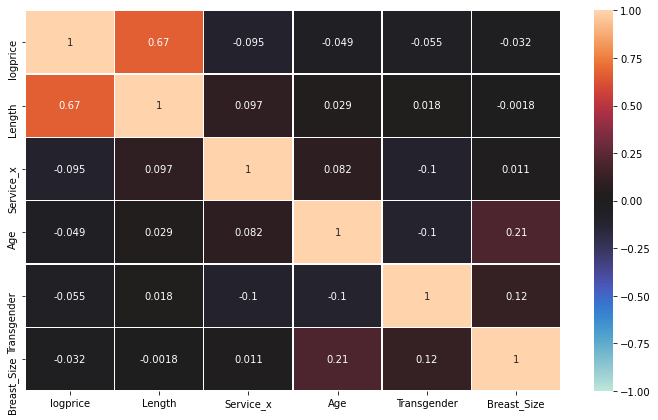

In [52]:
sns.heatmap(corr,   vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)
fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

In [53]:
df_1=df[['Price', 'Breast_Size', 'Breast_Cup','Breast_Implants','Breast_Appearance','Tattoos']]

corr = df_1.corr(method='spearman')

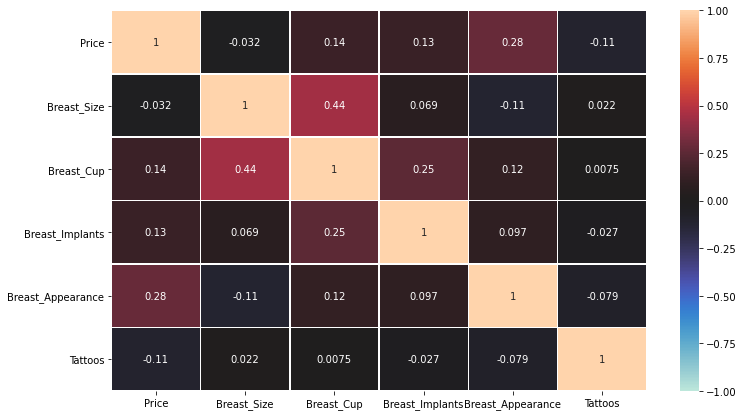

In [54]:
sns.heatmap(corr,   vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)
fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

In [55]:
df_1=df[['Price','Massage','Sex','Blow_Job','Cum_In_Mouth','Touch_Pussy','Kiss','Two_Girl_Action','More_Than_One_Guy_At_A_Time','Multiple_Pops_Allowed','Squirt','Female_Condom','Massage_Quality','S_M','Lick_Pussy', 'Anal','Will_Bring_Second_Provider','Full_No_Rush_Session','Rimming','Allow_Film_Or_Picture']]
corr = df_1.corr(method='spearman')

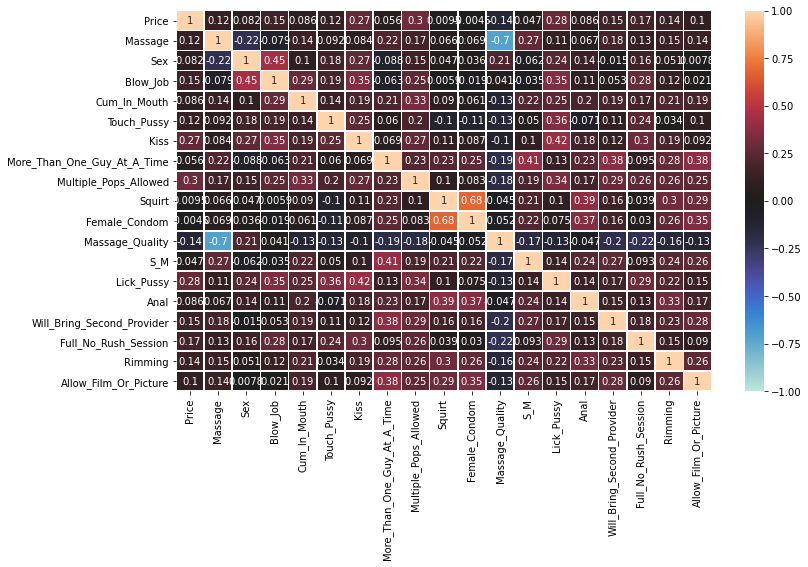

In [56]:
sns.heatmap(corr,   vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)
fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()